# Mushroom Classification

## Context

This dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. 

## Content

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

### Attribute Information:

0-classes dible=e, poisonous=p

1-cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

2-cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

3-cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

4-bruises: bruises=t,no=f

5-dor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

6-gill-attachment: attached=a,descending=d,free=f,notched=n

7-gill-spacing: close=c,crowded=w,distant=d

8-gill-size: broad=b,narrow=n

9-gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

10-stalk-shape: enlarging=e,tapering=t

11-stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

12-stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

13-stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

14-stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

15-stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

16-veil-type: partial=p,universal=u

17-veil-color: brown=n,orange=o,white=w,yellow=y

18-ring-number: none=n,one=o,two=t

19-ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

20-spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

21-population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

22-habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

### Importing required libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
print("setup complete")

setup complete


In [2]:
#loading dataset
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#checking shape of the dataset
df.shape

(8124, 23)

In [4]:
#checking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
#checking column names 
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
#inspecting target variable for no. of unique values and count of each class
print(df['class'].unique())
print(df['class'].value_counts())

['p' 'e']
e    4208
p    3916
Name: class, dtype: int64


In [7]:
#checking for missing values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

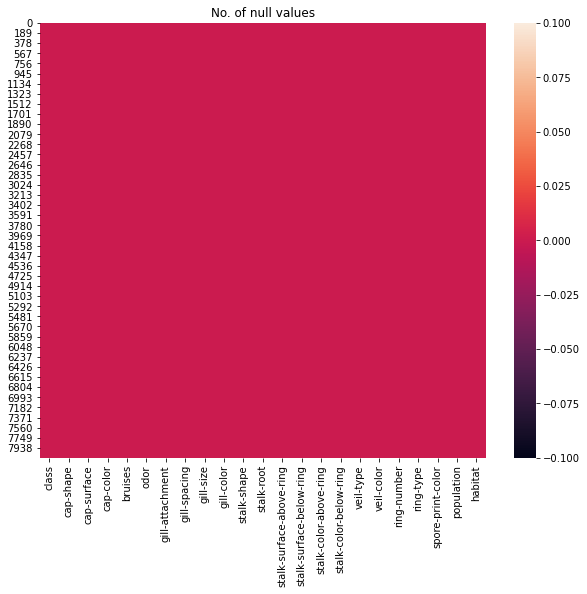

In [8]:
#plotting missing values on heatmap
plt.figure(figsize=(10,8))
plt.title('No. of null values')
sns.heatmap(df.isnull())
plt.show()

Observation :

- All the features are categorical in nature.

- There are two categories of mushrooms poisonous and edible 

- There are nonullvalues in the dataset 

## Data visualisation and analysis

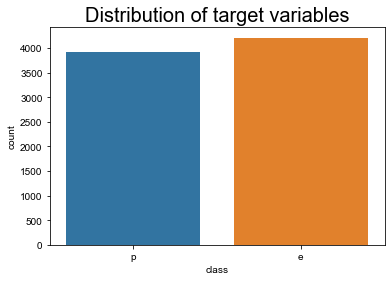

In [9]:
plt.title("Distribution of target variables",fontsize = 20)
sns.countplot(df['class'])
sns.set_style("darkgrid")
plt.show()

Observation :

- Here p = poisonous and e = edible  

- Dataset is balanced

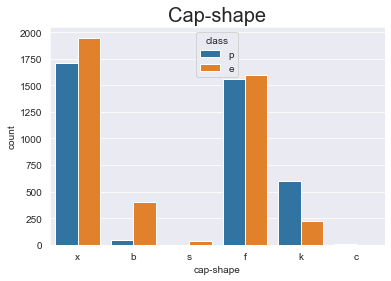

In [10]:
plt.title("Cap-shape",fontsize = 20)
sns.countplot(x=df['cap-shape'],hue=df['class'])
plt.show()

Observation :
    
- Here, bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

- Mushrooms with cap shape of bell appear to be more edible than other cap shapes.

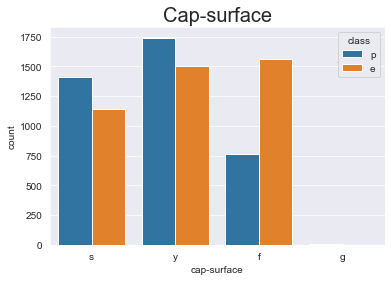

In [11]:
plt.title("Cap-surface",fontsize = 20)
sns.countplot(x=df['cap-surface'],hue=df['class'])
plt.show()

Observation : 

- Here, fibrous=f, grooves=g, scaly=y, smooth=s

- Mushrooms with fibrous cap-surface appears more edible

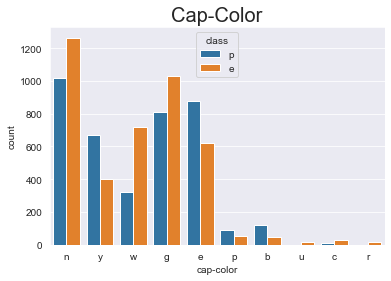

In [12]:
plt.title("Cap-Color",fontsize = 20)
sns.countplot(x=df['cap-color'],hue=df['class'])
plt.show()

Observations:

- Here, brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

- Mushrooms with white cap-color appears more edible

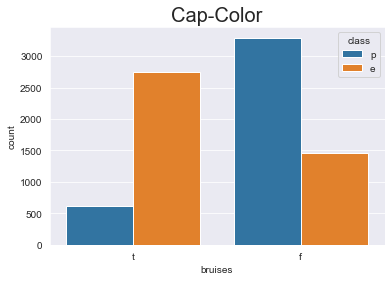

In [13]:
plt.title("Cap-Color",fontsize = 20)
sns.countplot(x=df['bruises'],hue=df['class'])
plt.show()

Observations : 

- Here, bruises=t, no=f

- Mushrooms with bruises appear to be more edible

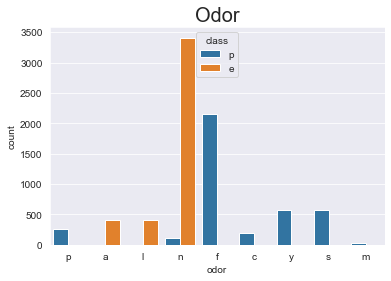

In [14]:
plt.title("Odor",fontsize = 20)
sns.countplot(x=df['odor'],hue=df['class'])
plt.show()

Observations : 

- Here, almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

- Mushrooms with no odor appears to be more edible

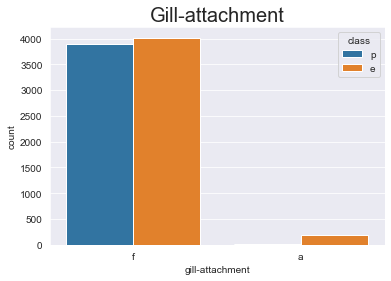

In [15]:
plt.title("Gill-attachment",fontsize = 20)
sns.countplot(x=df['gill-attachment'],hue=df['class'])
plt.show()

Observations:

- Here, attached=a, descending=d, free=f, notched=n

- Mushrooms with notched gill-attachment appears to be edible.

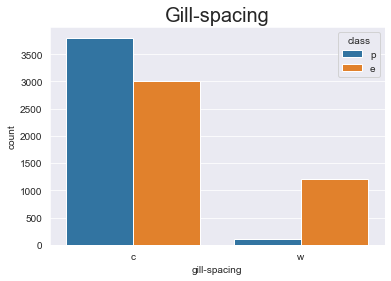

In [16]:
plt.title("Gill-spacing",fontsize = 20)
sns.countplot(x=df['gill-spacing'],hue=df['class'])
plt.show()

Observations:

- Here, close=c, crowded=w, distant=d

- Mushrooms with crowded gill-spacing appears to be edible.

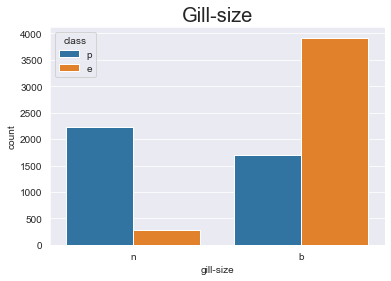

In [17]:
plt.title("Gill-size",fontsize = 20)
sns.countplot(x=df['gill-size'],hue=df['class'])
plt.show()

Observations:

- Here, broad=b, narrow=n

- Mushrooms with broad gill-size appears to be edible.

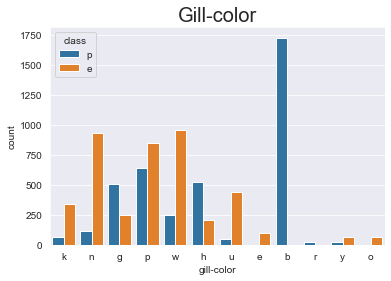

In [18]:
plt.title("Gill-color",fontsize = 20)
sns.countplot(x=df['gill-color'],hue=df['class'])
plt.show()

Observations:

- Here, black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

- Mushrooms with brown and white gill-color appears to be edible.

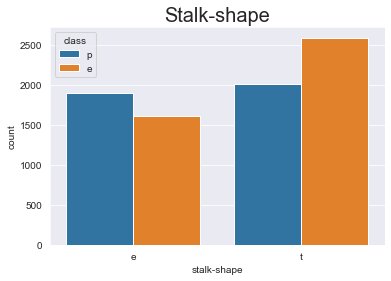

In [19]:
plt.title("Stalk-shape",fontsize = 20)
sns.countplot(x=df['stalk-shape'],hue=df['class'])
plt.show()

Observations:

- Here, enlarging=e, tapering=t

- Mushrooms with tapering stalk shape appears to be edible.

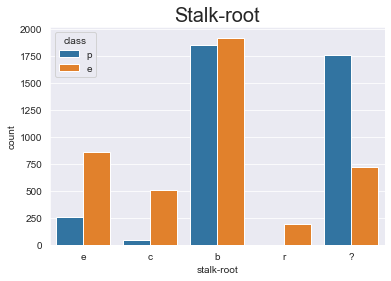

In [20]:
plt.title("Stalk-root",fontsize = 20)
sns.countplot(x=df['stalk-root'],hue=df['class'])
plt.show()

Observations:

- Here, bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

- Mushrooms with equal stalk root appears to be edible.

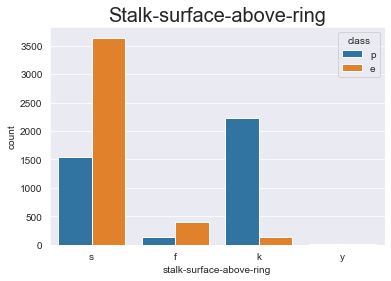

In [21]:
plt.title("Stalk-surface-above-ring",fontsize = 20)
sns.countplot(x=df['stalk-surface-above-ring'],hue=df['class'])
plt.show()

Observations:

- Here, fibrous=f, scaly=y, silky=k, smooth=s

- Mushrooms with smooth stalk-surface-above-ring appears to be edible.

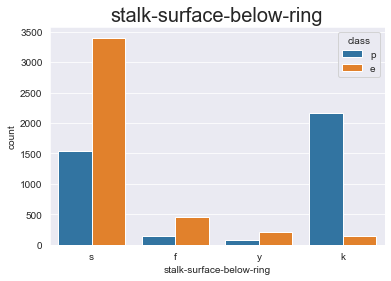

In [22]:
plt.title("stalk-surface-below-ring",fontsize = 20)
sns.countplot(x=df['stalk-surface-below-ring'],hue=df['class'])
plt.show()

Observations:

- Here, fibrous=f, scaly=y, silky=k, smooth=s

- Mushrooms with smooth stalk-surface-below-ring appears to be edible.

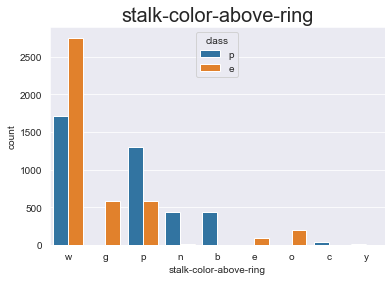

In [23]:
plt.title("stalk-color-above-ring",fontsize = 20)
sns.countplot(x=df['stalk-color-above-ring'],hue=df['class'])
plt.show()

Observations:

- Here, brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

- Mushrooms with white stalk-color-above-ring appears to be edible.

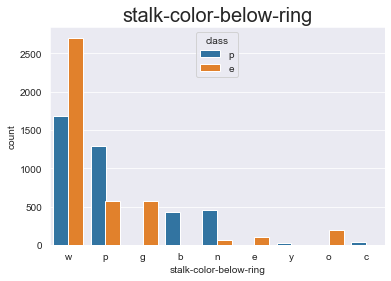

In [24]:
plt.title("stalk-color-below-ring",fontsize = 20)
sns.countplot(x=df['stalk-color-below-ring'],hue=df['class'])
plt.show()

Observations:

- Here, brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

- Mushrooms with white stalk-color-below-ring appears to be edible.

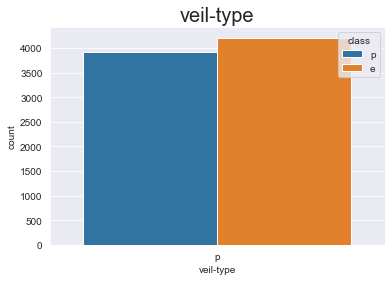

In [25]:
plt.title("veil-type",fontsize = 20)
sns.countplot(x=df['veil-type'],hue=df['class'])
plt.show()

Observations:

- Here, partial = p

- Cant say anything regarding veil-type since there is not enough info on other types

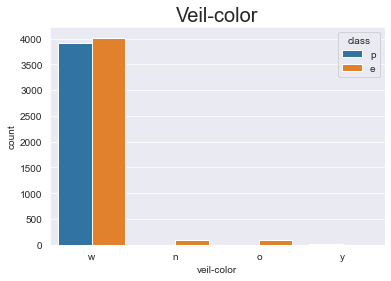

In [26]:
plt.title("Veil-color",fontsize = 20)
sns.countplot(x=df['veil-color'],hue=df['class'])
plt.show()

Observations:

- Here, brown=n, orange=o, white=w, yellow=y

- Mushrooms with brown and white veil-color appears to be edible.

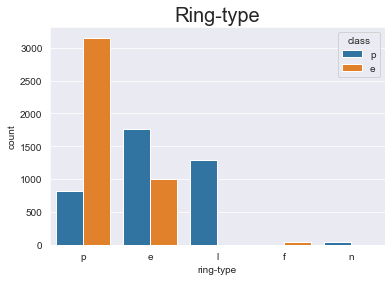

In [27]:
plt.title("Ring-type",fontsize = 20)
sns.countplot(x=df['ring-type'],hue=df['class'])
plt.show()

Observations:

- Here, cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

- Mushrooms with pendant ring-type appears to be edible.

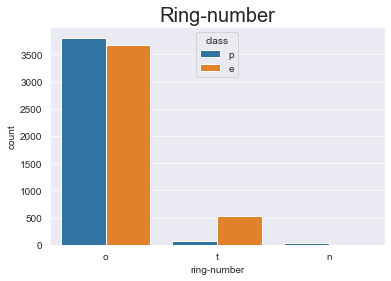

In [28]:
plt.title("Ring-number",fontsize = 20)
sns.countplot(x=df['ring-number'],hue=df['class'])
plt.show()

Observations:

- Here, none=n,one=o,two=t

- Mushrooms with two ring-number appears to be edible.

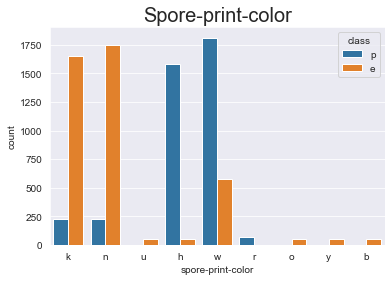

In [29]:
plt.title("Spore-print-color",fontsize = 20)
sns.countplot(x=df['spore-print-color'],hue=df['class'])
plt.show()

Observations:

- Here, black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

- Mushrooms with black and brown spore print color appears to be edible.

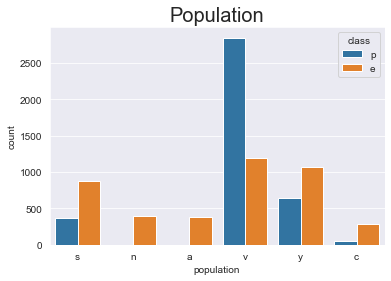

In [30]:
plt.title("Population",fontsize = 20)
sns.countplot(x=df['population'],hue=df['class'])
plt.show()

Observations:

- Here, abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

- Mushrooms with numerous and abundant population appears to be edible.

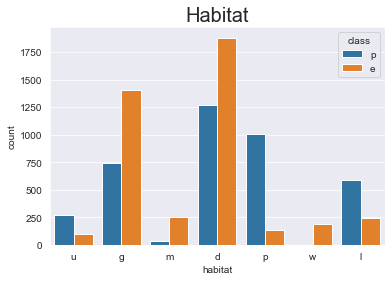

In [31]:
plt.title("Habitat",fontsize = 20)
sns.countplot(x=df['habitat'],hue=df['class'])
plt.show()

Observations:

- Here, grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

- Mushrooms in habitats such as meadows and waste appears to be edible.

In [33]:
#Checking value counts for each category in the dataset
for i in df.columns :
    print(i)
    print(df[i].value_counts())
    print('*'*10)

class
e    4208
p    3916
Name: class, dtype: int64
**********
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
**********
cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
**********
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
**********
bruises
f    4748
t    3376
Name: bruises, dtype: int64
**********
odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
**********
gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64
**********
gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64
**********
gill-size
b    5612
n    2512
Name: gill-size, dtype: int64
**********
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dt

In [5]:
#creating a copy of dataset to keep the original data unchanged
df2 = df.copy()

In [6]:
df2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
#since there is only one unique value for veil-type, we can drop it.
df2.drop(['veil-type'],axis=1,inplace=True)

In [8]:
#since there is an missing category in stalk - root replacing it by unknown
df2.replace("?","unknown",inplace=True)

In [9]:
df2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [11]:
df2['stalk-root'].value_counts()

b          3776
unknown    2480
e          1120
c           556
r           192
Name: stalk-root, dtype: int64

### Label Encoding

In [12]:
#encoding the data since all the values are categorical
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for i in df2.columns:
    df2[i] = LE.fit_transform(df2[i])
    
df2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


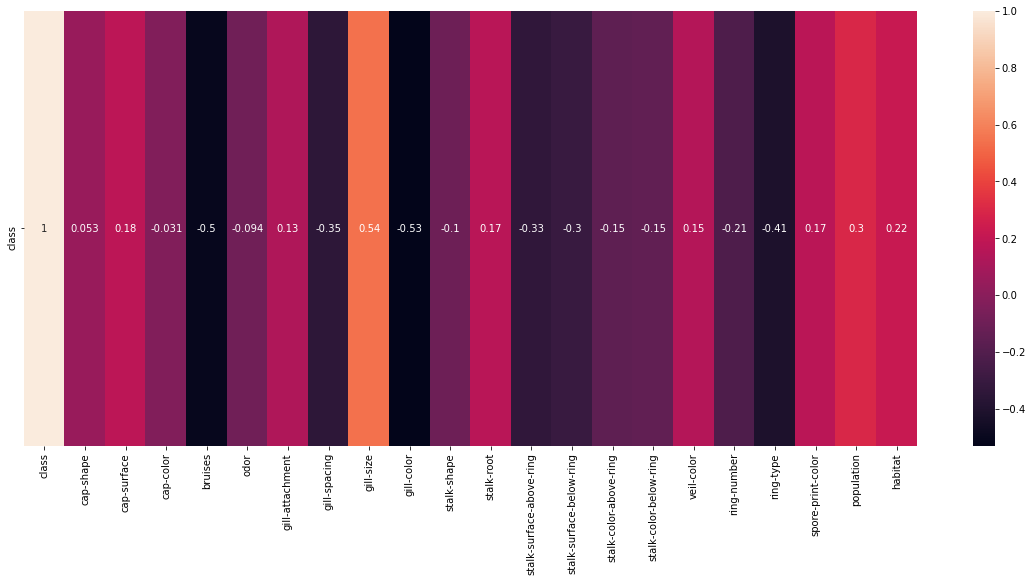

In [13]:
#correlation of features with class
cor = df2.corr().loc[['class'],:]
plt.figure(figsize=(20,8))
sns.heatmap(cor,annot=True)
plt.show()

#### Splitting into target and feature variables

In [14]:
X = df2.drop("class",axis=1)
y = df2["class"]

In [16]:
#shape of feature set
X.shape

(8124, 21)

In [17]:
#shape of target set
y.shape

(8124,)

#### Finding best random state

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

maxacc=0
maxrs=0
for i in range(1,200):
    xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3,random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(xtrain,ytrain)
    pred = mod.predict(xtest)
    acc = accuracy_score(ytest,pred)
    if acc>maxacc:
        maxacc = acc
        maxrs = i
print("Best accuracy is : ", maxacc, " best random state : ", maxrs)

Best accuracy is :  1.0  best random state :  1


#### Train/Test Split

In [19]:
 xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3,random_state=1)

In [20]:
#importing metrics for model evaluation
from sklearn.metrics import classification_report,confusion_matrix

### Evaluating for different models

In [27]:
# importing cross validation score 
from sklearn.model_selection import cross_val_score

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



<AxesSubplot:>

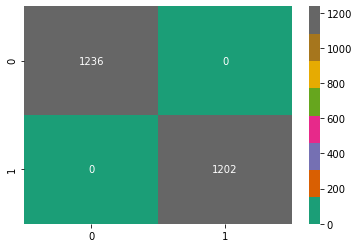

In [21]:
#Decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(xtrain,ytrain)
pred = clf.predict(xtest)
print(classification_report(ytest,pred))

cm = confusion_matrix(ytest, pred)
sns.heatmap(cm, annot=True,fmt='d',cmap='Dark2')


In [28]:
print("Cross validation score",cross_val_score(clf,X,y,scoring='accuracy',cv=5).mean())

Cross validation score 0.9167684729064038


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1236
           1       0.96      0.95      0.96      1202

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



<AxesSubplot:>

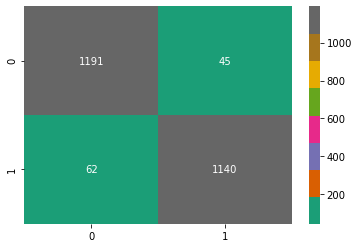

In [22]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression()
clf2.fit(xtrain,ytrain)
pred2=clf2.predict(xtest)

print(classification_report(ytest,pred2))

cm2 = confusion_matrix(ytest, pred2)
sns.heatmap(cm2, annot=True,fmt='d',cmap='Dark2')

In [29]:
print("Cross validation score",cross_val_score(clf2,X,y,scoring='accuracy',cv=5).mean())

Cross validation score 0.8685335354300872


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



<AxesSubplot:>

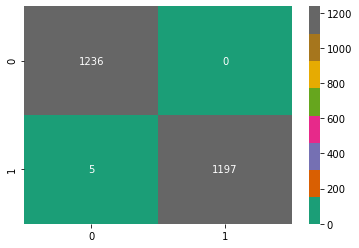

In [23]:
# support vector machine
from sklearn.svm import SVC

clf3 = SVC()
clf3.fit(xtrain,ytrain)
pred3 = clf3.predict(xtest)

print(classification_report(ytest,pred3))

cm3 = confusion_matrix(ytest, pred3)
sns.heatmap(cm3, annot=True,fmt='d',cmap='Dark2')

In [30]:
print("Cross validation score",cross_val_score(clf3,X,y,scoring='accuracy',cv=5).mean())

Cross validation score 0.8644409245926488


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



<AxesSubplot:>

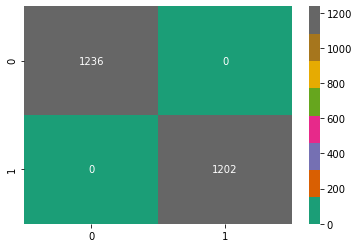

In [24]:
# K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

clf4 = KNeighborsClassifier()
clf4.fit(xtrain,ytrain)
pred4 = clf4.predict(xtest)

print(classification_report(ytest,pred4))

cm4 = confusion_matrix(ytest, pred4)
sns.heatmap(cm4, annot=True,fmt='d',cmap='Dark2')

In [31]:
print("Cross validation score",cross_val_score(clf4,X,y,scoring='accuracy',cv=5).mean())

Cross validation score 0.8602482000757863


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



<AxesSubplot:>

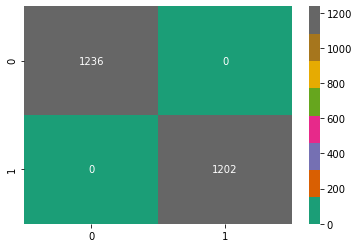

In [25]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier

clf5 = RandomForestClassifier()
clf5.fit(xtrain,ytrain)
pred5 = clf5.predict(xtest)

print(classification_report(ytest,pred5))

cm5 = confusion_matrix(ytest, pred5)
sns.heatmap(cm5, annot=True,fmt='d',cmap='Dark2')

In [32]:
print("Cross validation score",cross_val_score(clf5,X,y,scoring='accuracy',cv=5).mean())

Cross validation score 0.8997730958696476


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



<AxesSubplot:>

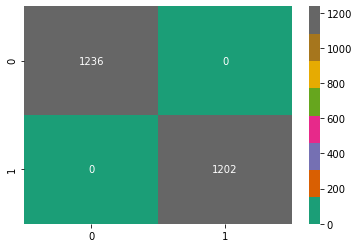

In [26]:
#Bernouli Naive Bayes  
from sklearn.naive_bayes import BernoulliNB

clf6 = RandomForestClassifier()
clf6.fit(xtrain,ytrain)
pred6 = clf6.predict(xtest)

print(classification_report(ytest,pred6))

cm6 = confusion_matrix(ytest, pred6)
sns.heatmap(cm6, annot=True,fmt='d',cmap='Dark2')

In [33]:
print("Cross validation score",cross_val_score(clf6,X,y,scoring='accuracy',cv=5).mean())

Cross validation score 0.8976796513830998


Decision Tree is the best model

### Hyperparameter tuning

In [34]:
# importing GridSearchCV for tuning
from sklearn.model_selection import GridSearchCV

In [35]:
#tuning the model and finding the best parameters for the classifier
#Grid Search method
grid_search = GridSearchCV(DecisionTreeClassifier(),
               {"criterion":["gini", "entropy"],
               "max_depth": (np.arange(2,12))},
                cv=5)
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])})

In [36]:
# Best parameters for the model
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 7}

### Final Model

In [37]:
#building final model as Decision Tree
Final_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7)
Final_model.fit(xtrain,ytrain)
Final_pred = Final_model.predict(xtest)
acc = accuracy_score(ytest,Final_pred)
print("Accuracy of the model : ", acc*100)

Accuracy of the model :  100.0


### Saving the Model

In [38]:
#saving the model using joblib module
import joblib
joblib.dump(Final_model,"MushroomFinalModel.pkl")

['MushroomFinalModel.pkl']